Mean Squared Error: 57.52680142468607
Predictions: [[37.19057998  0.34844855  8.94154368  3.29222277 52.58656992]]


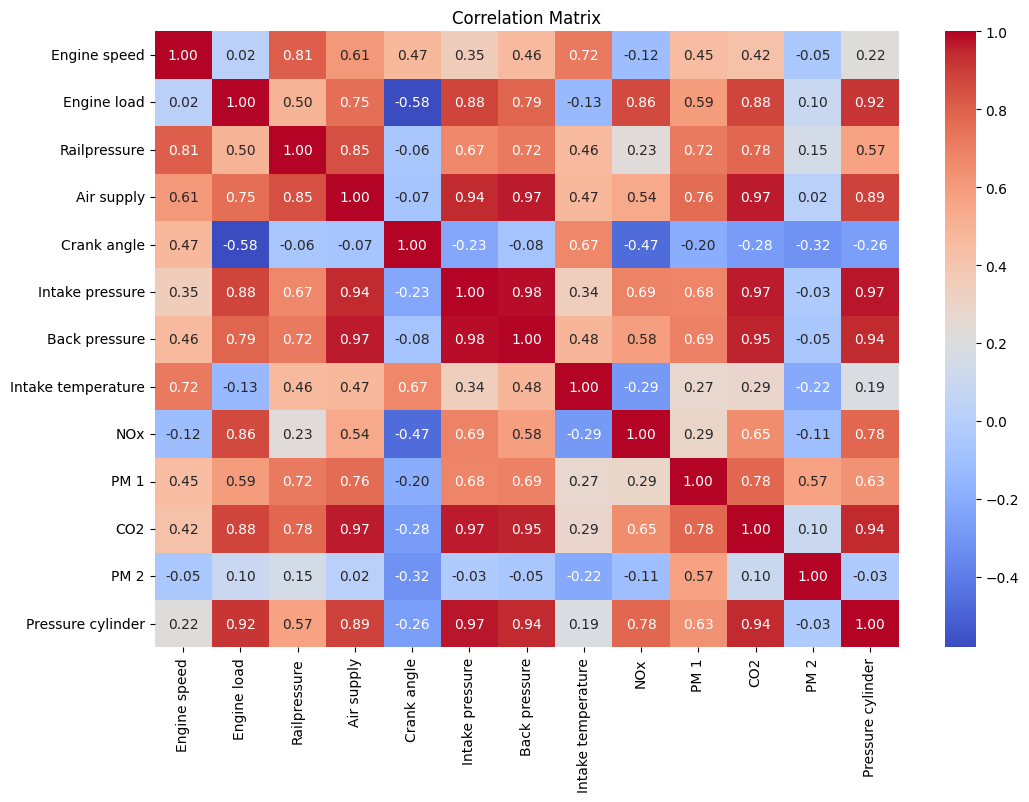

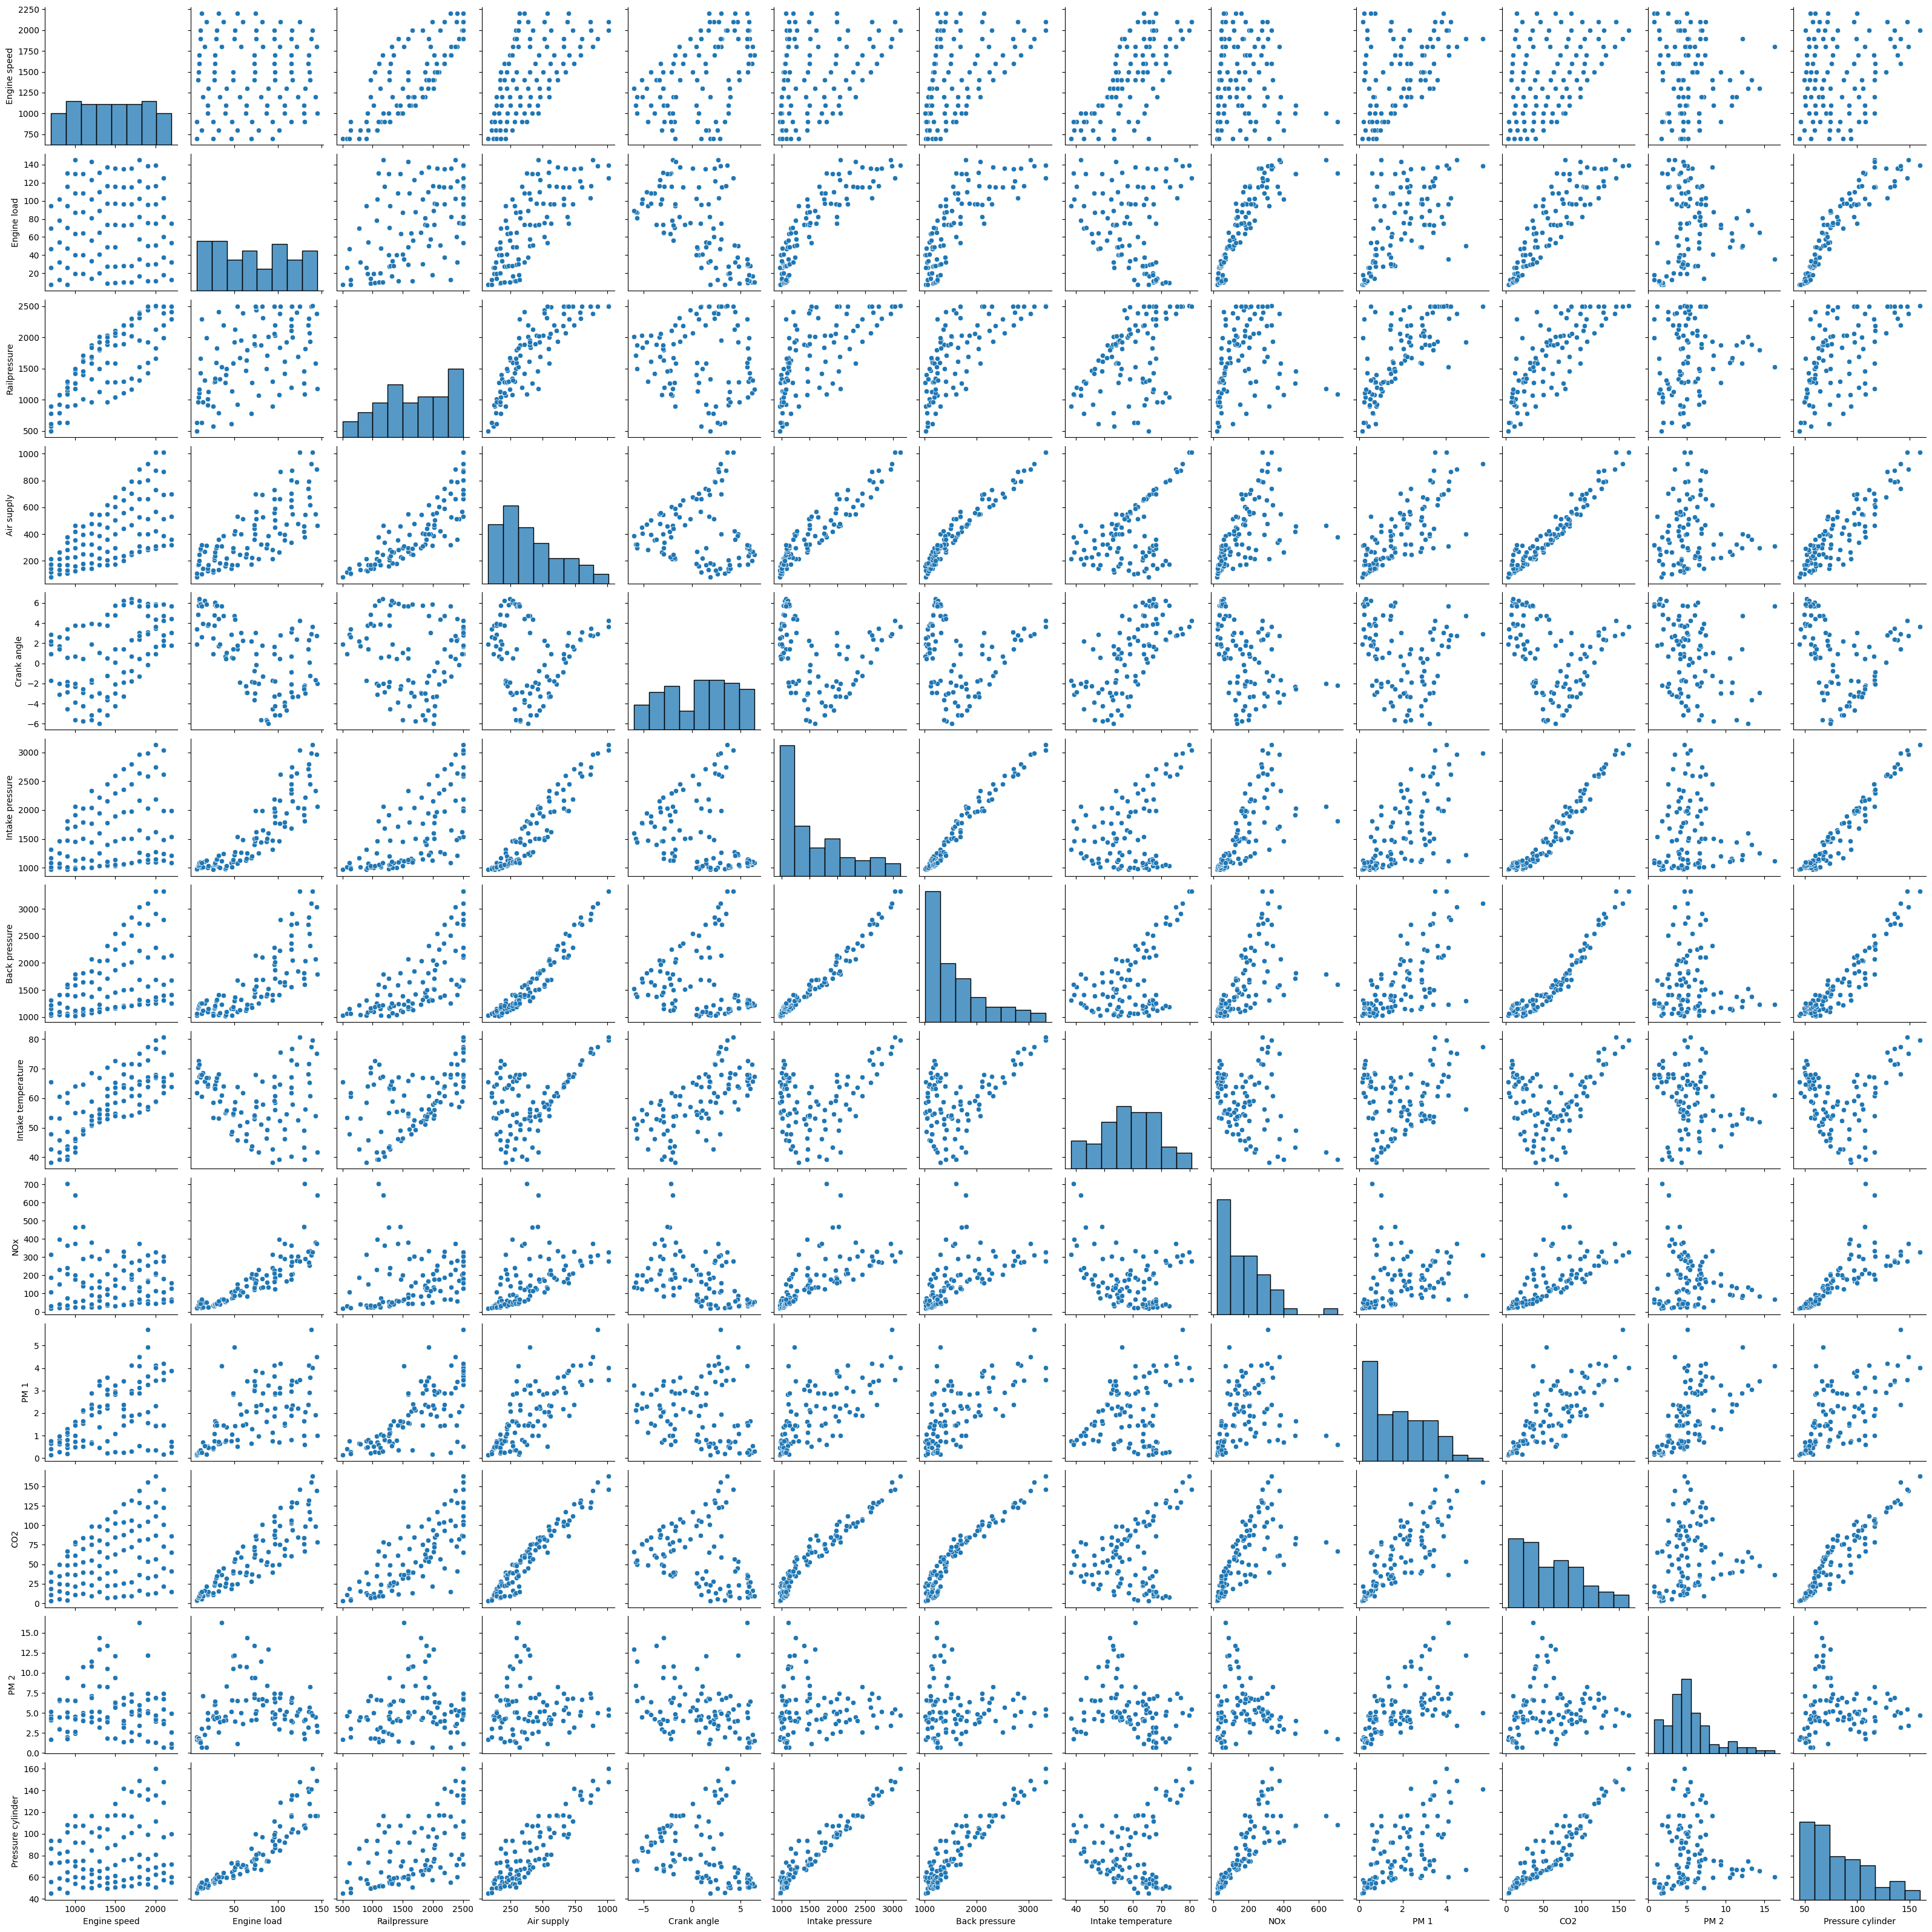

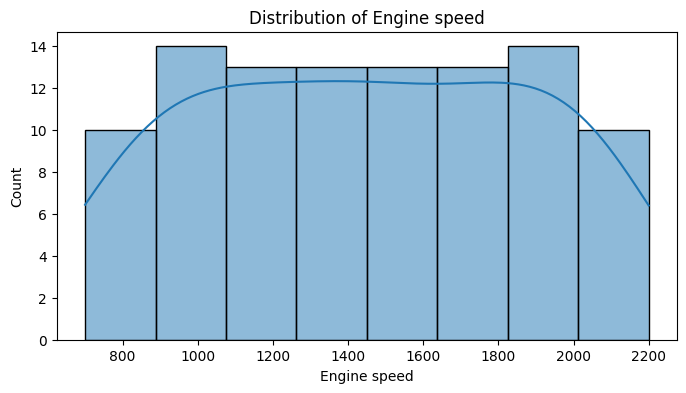

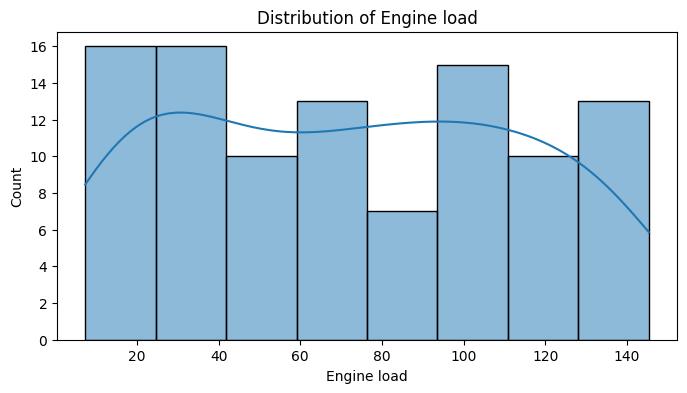

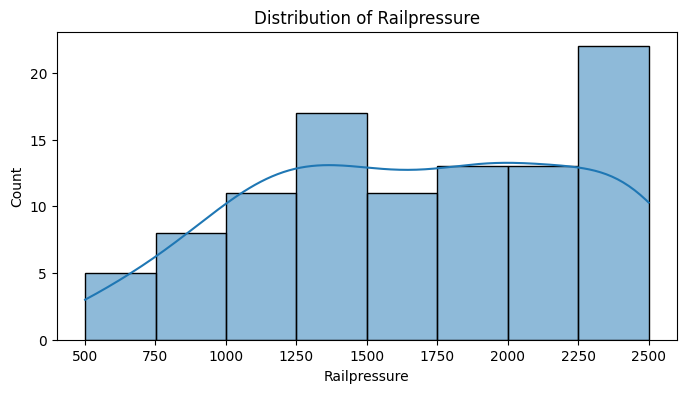

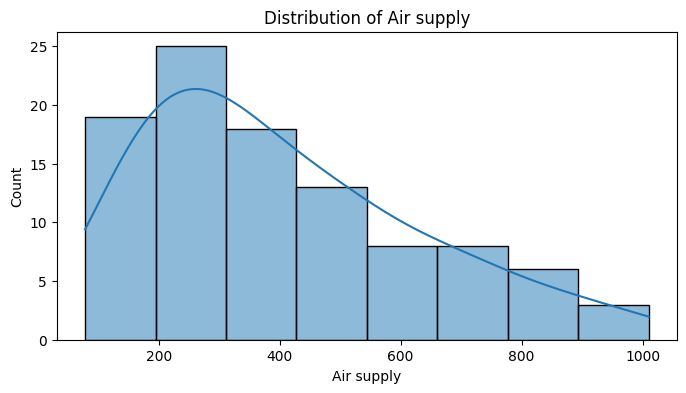

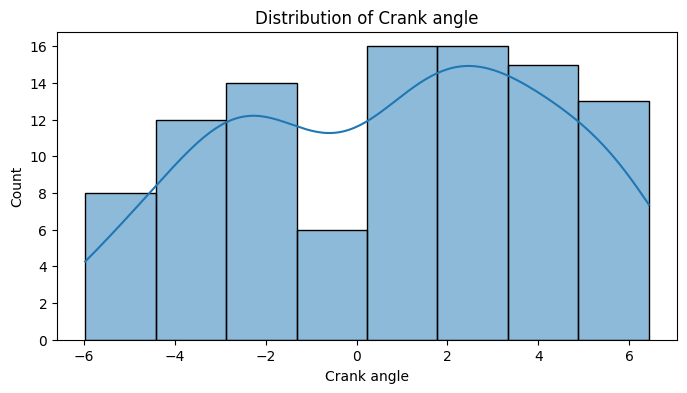

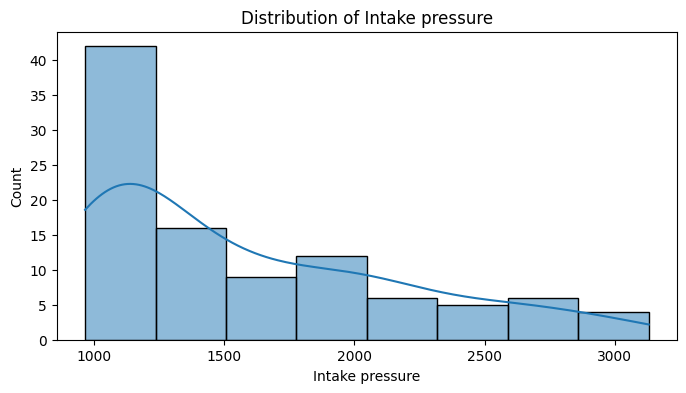

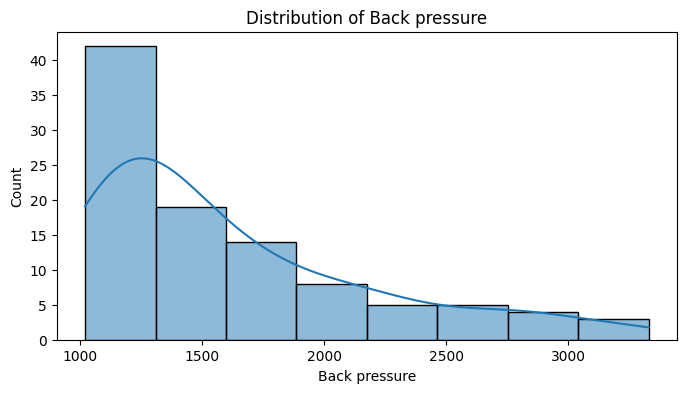

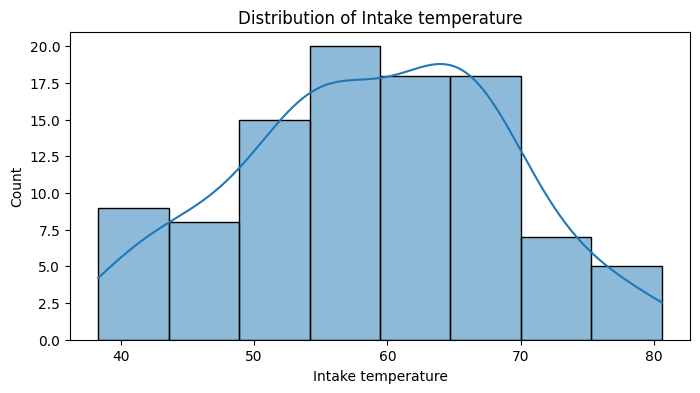

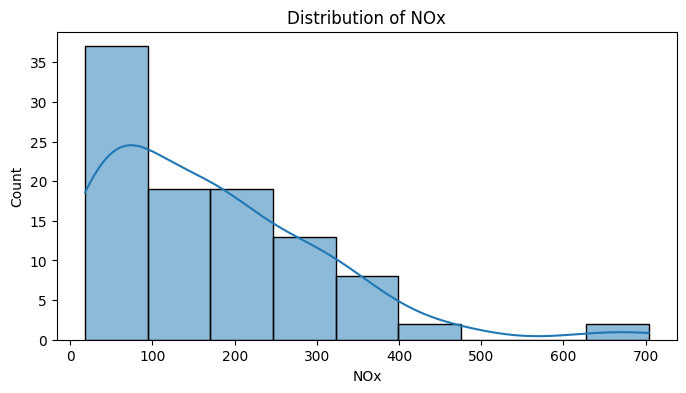

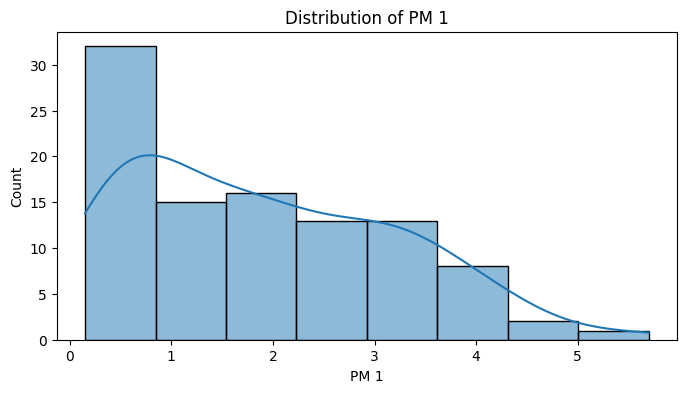

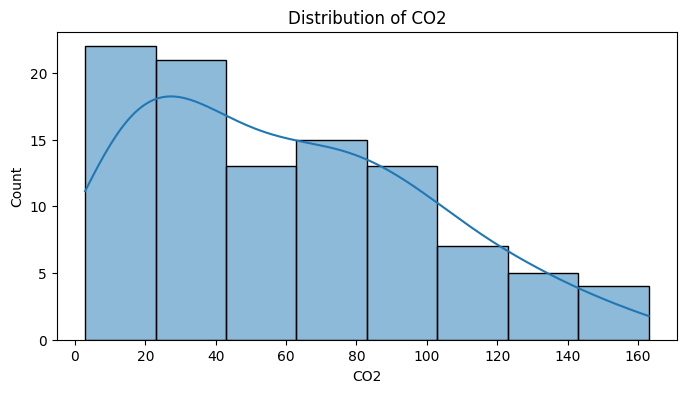

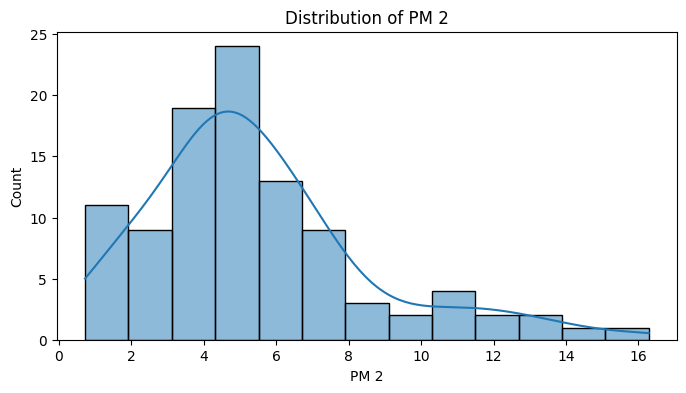

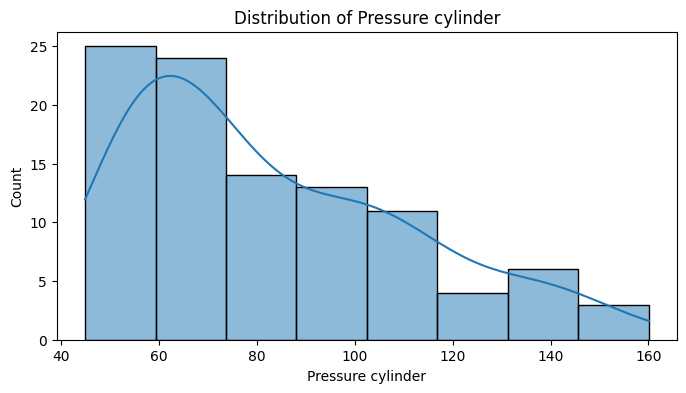

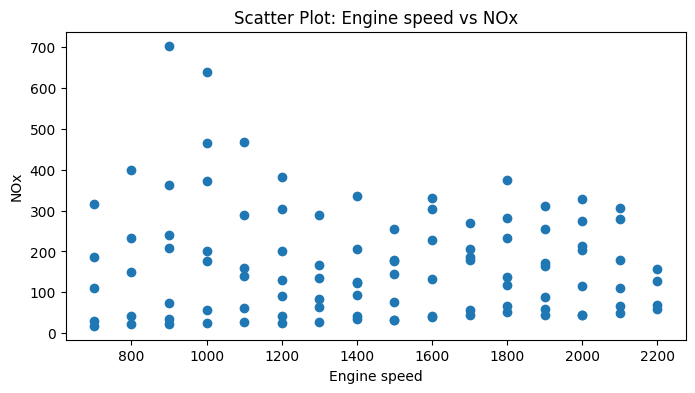

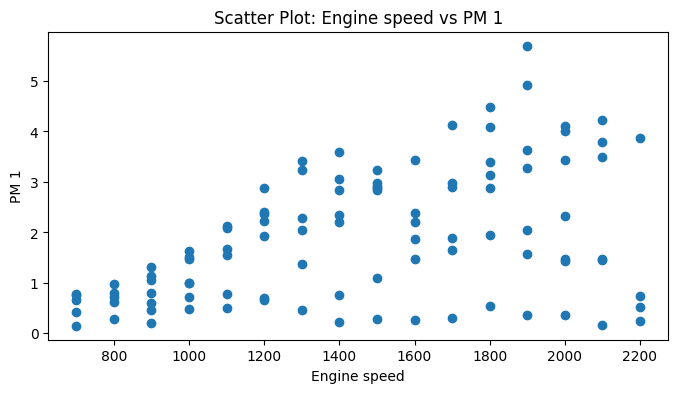

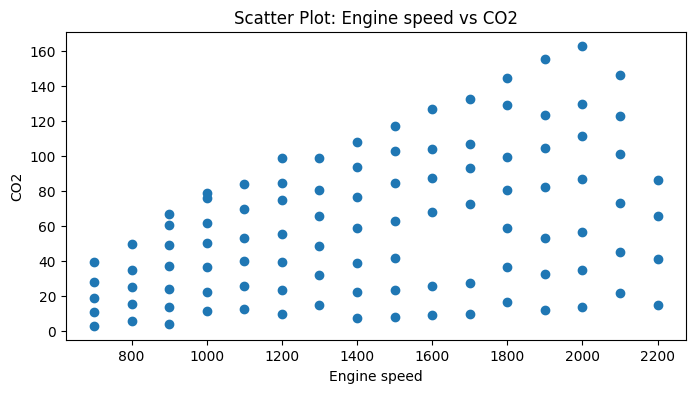

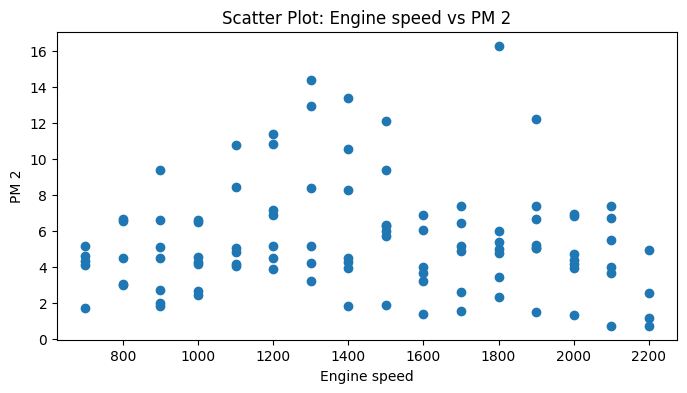

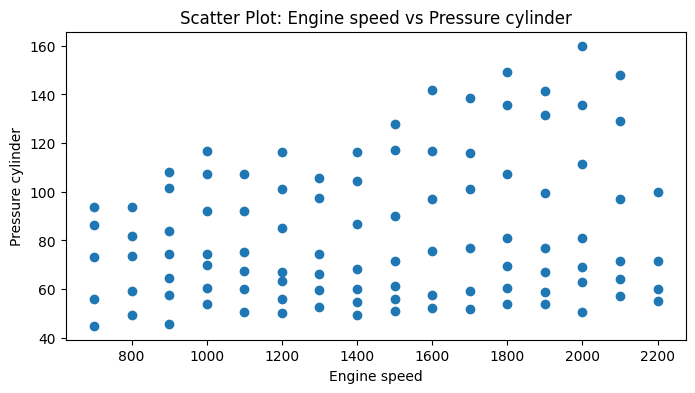

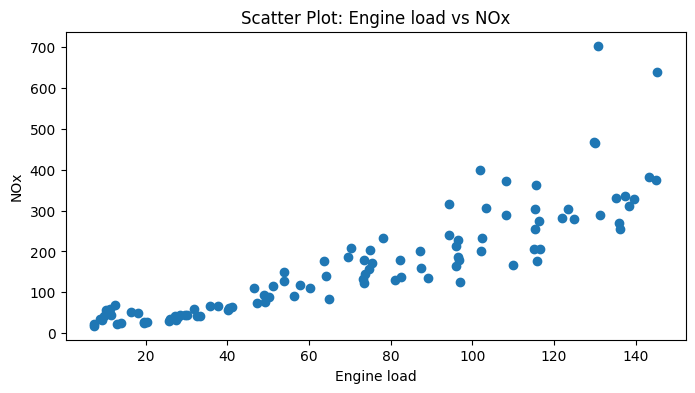

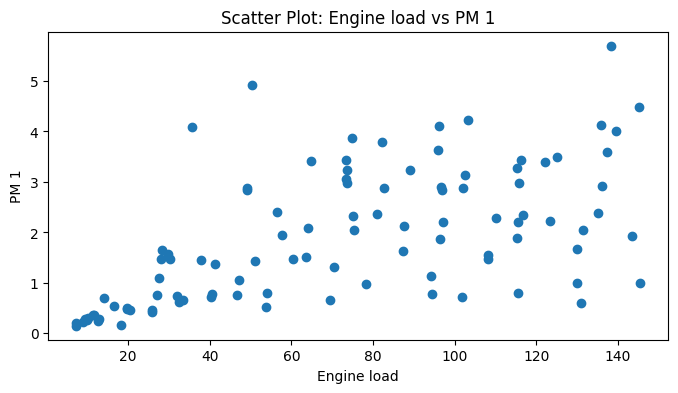

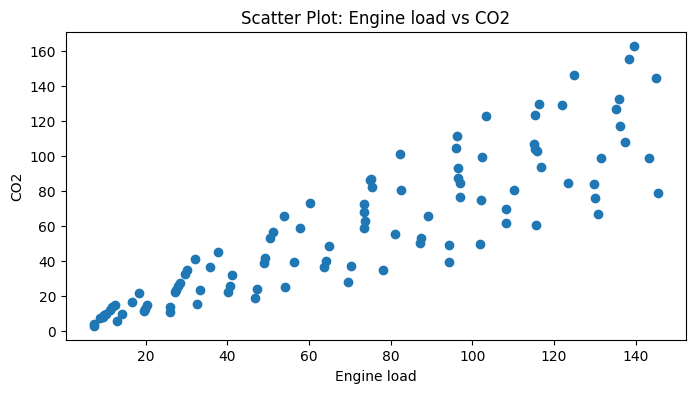

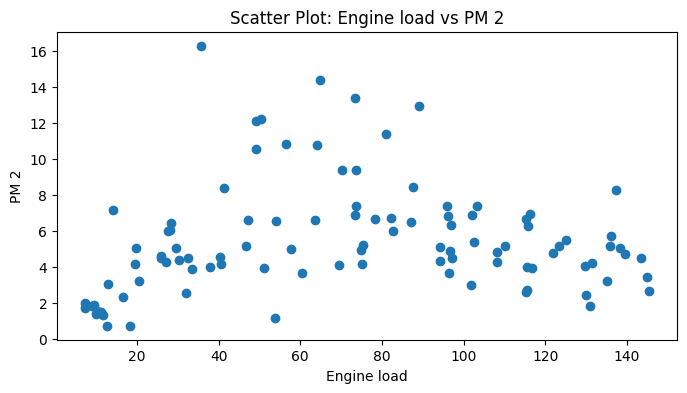

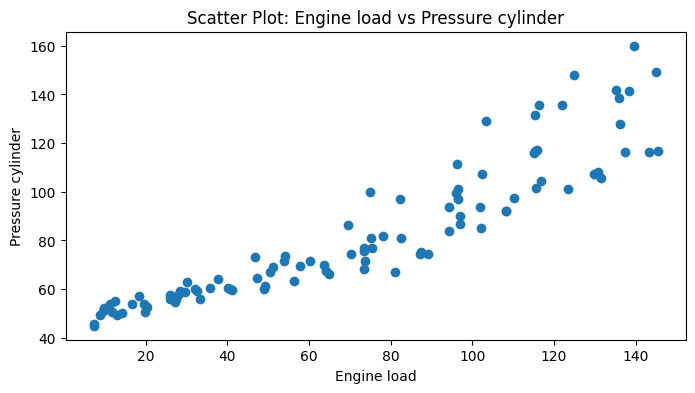

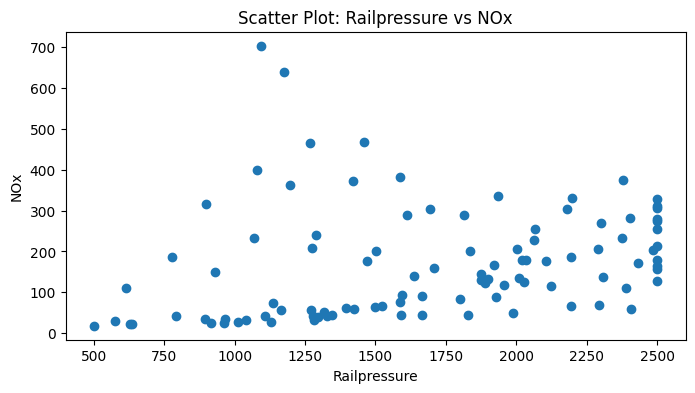

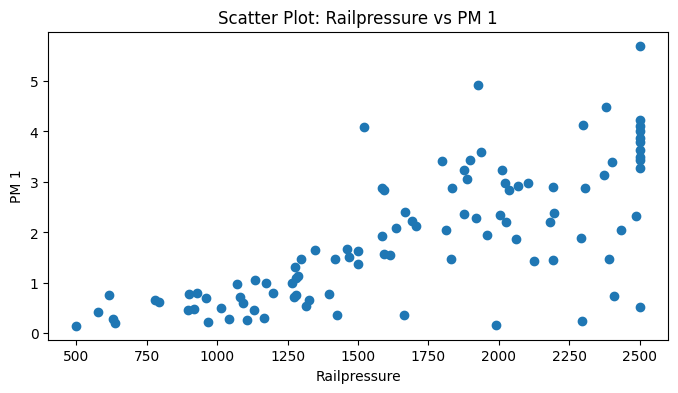

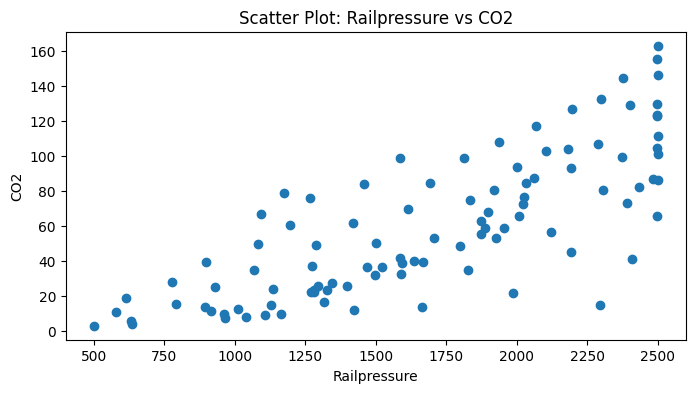

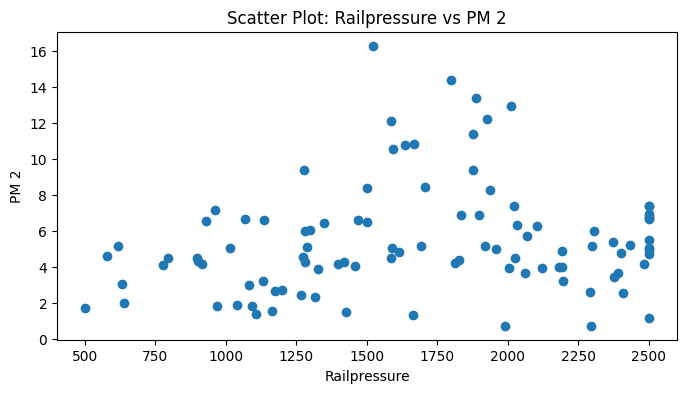

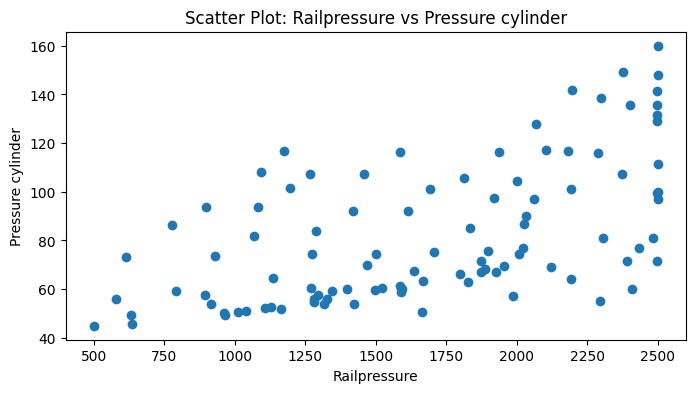

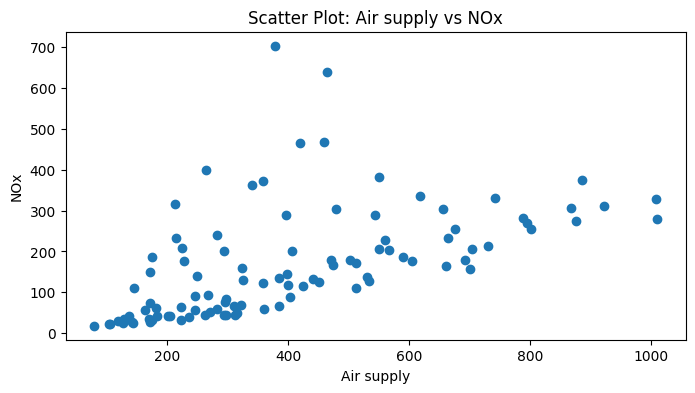

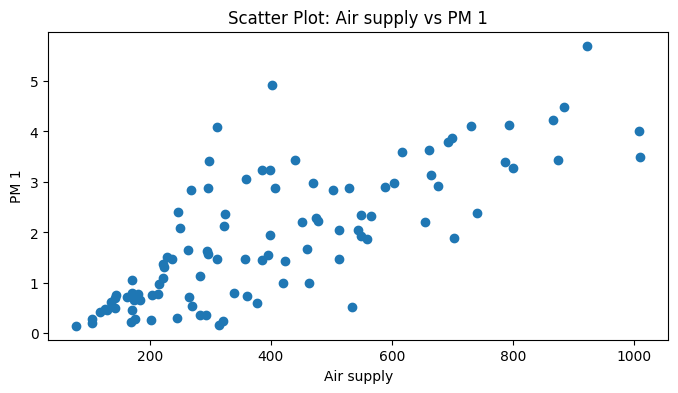

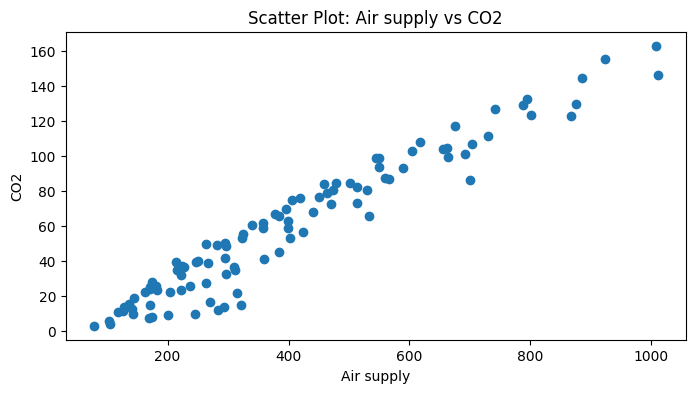

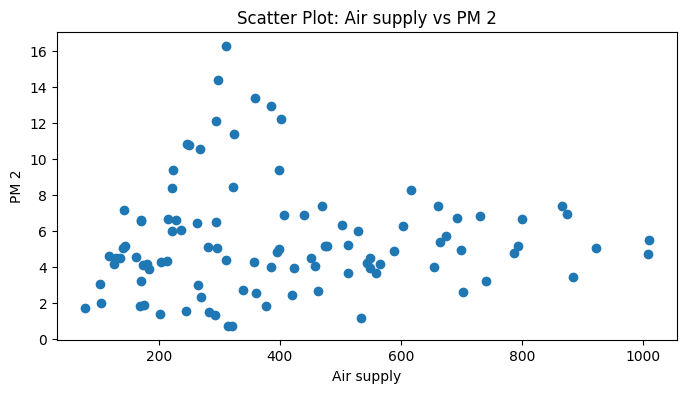

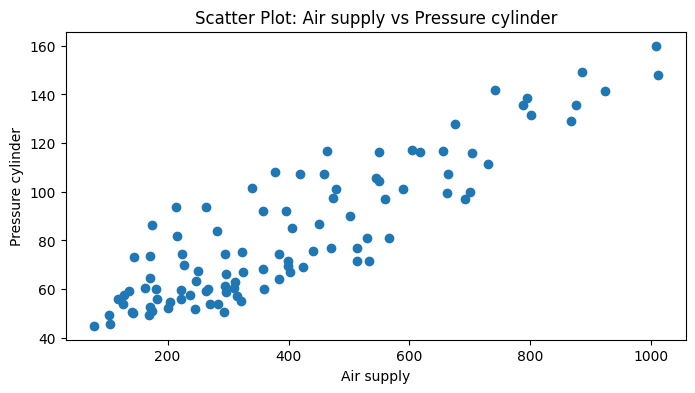

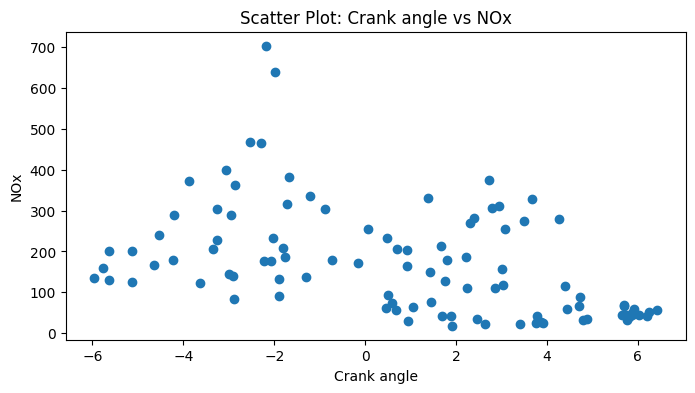

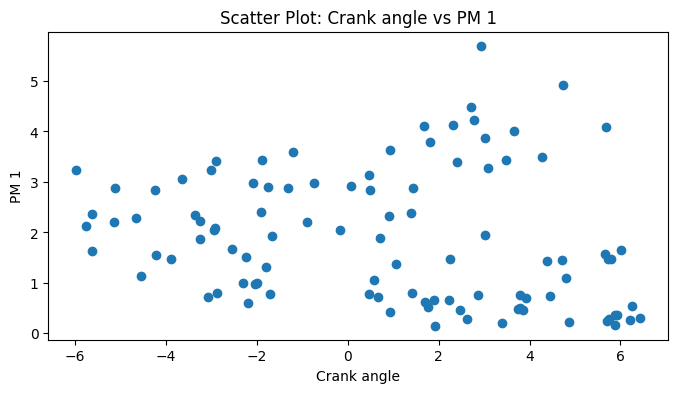

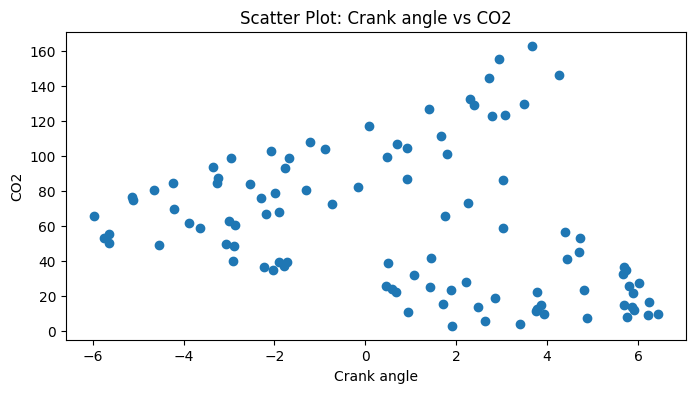

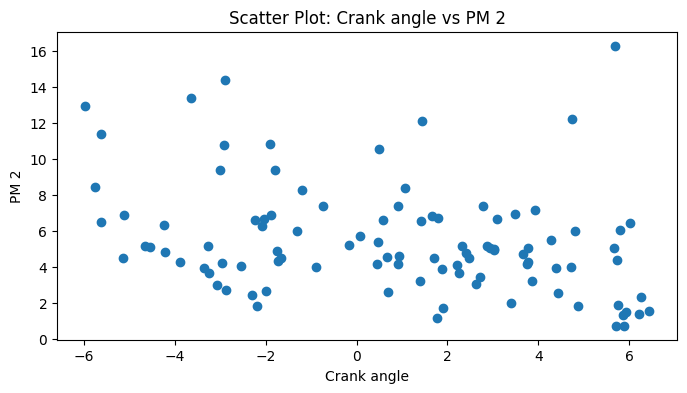

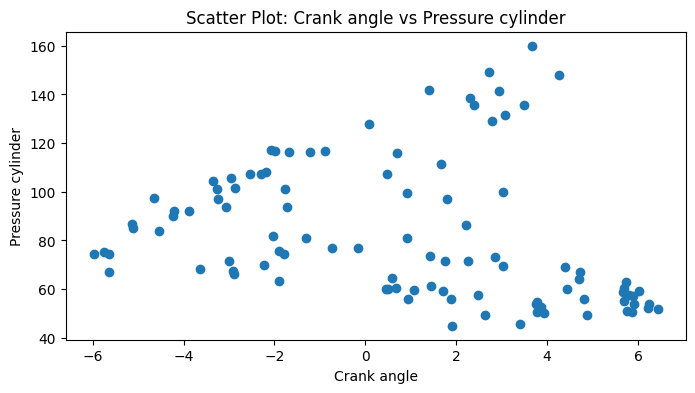

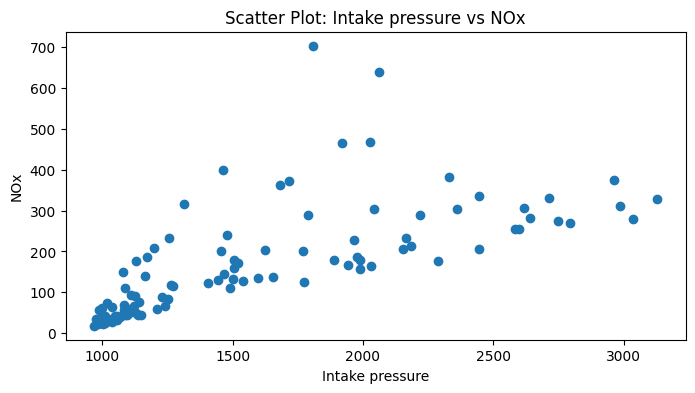

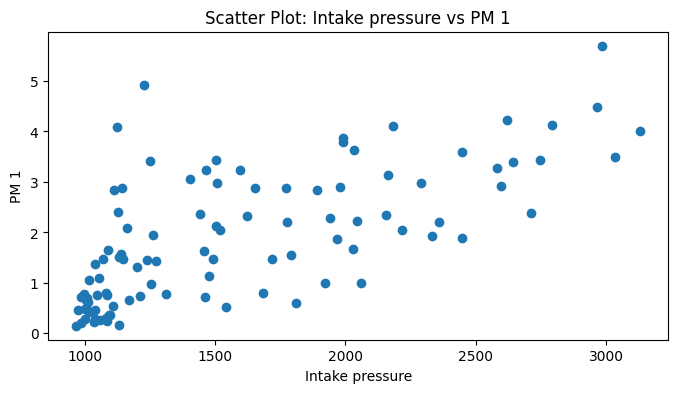

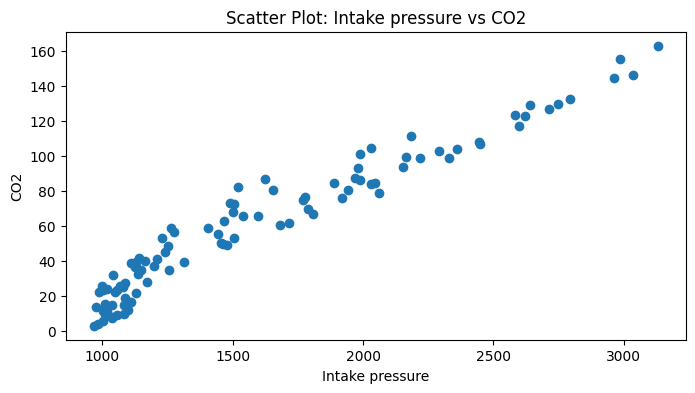

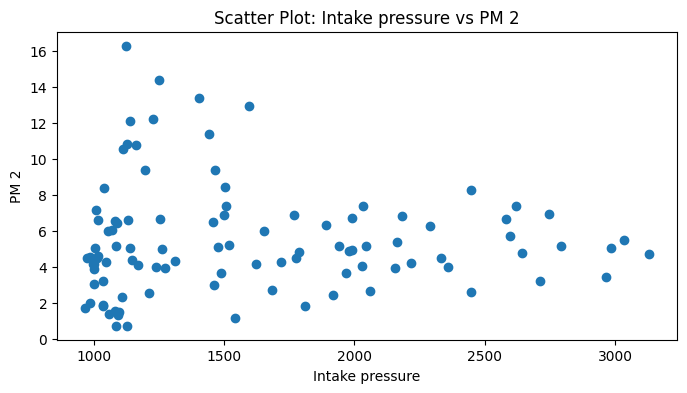

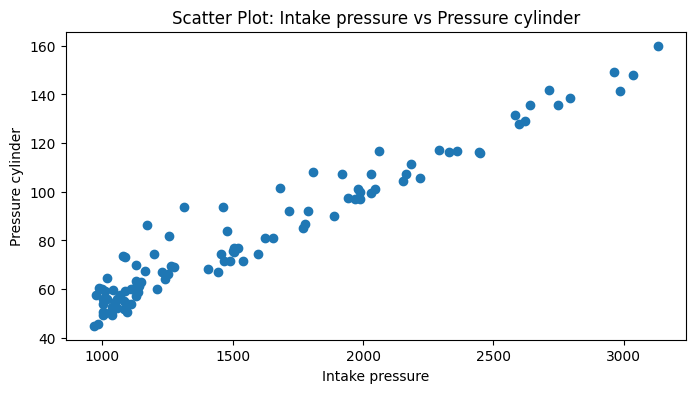

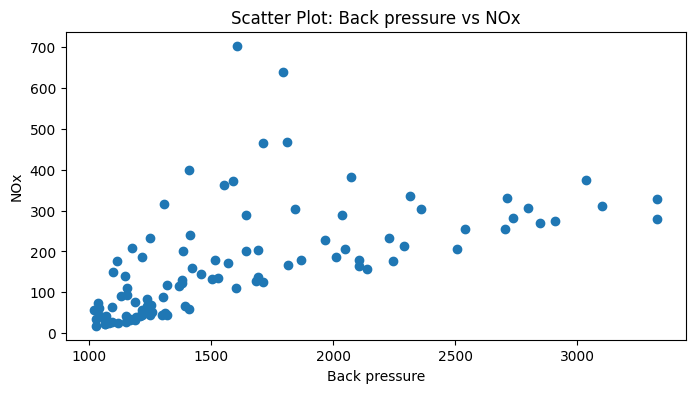

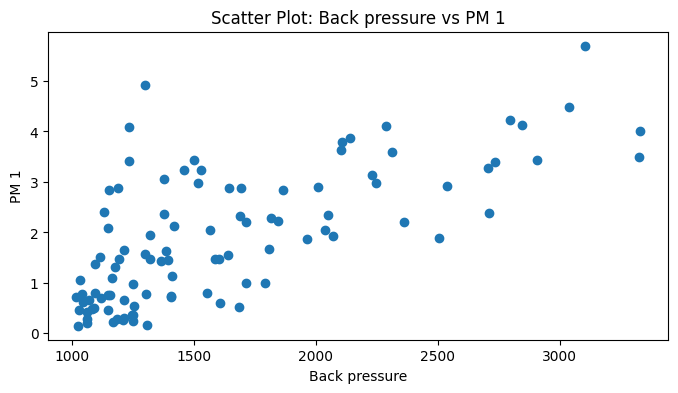

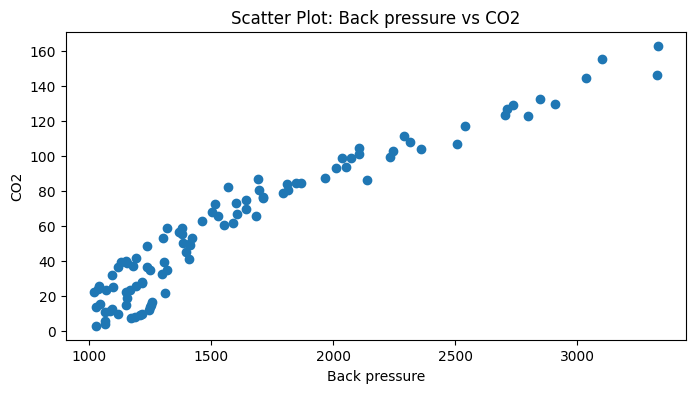

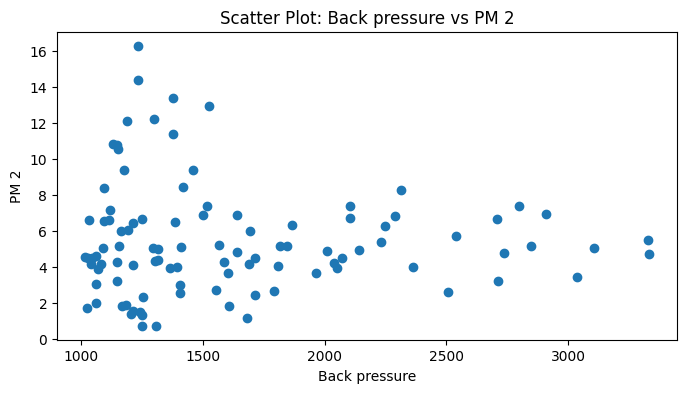

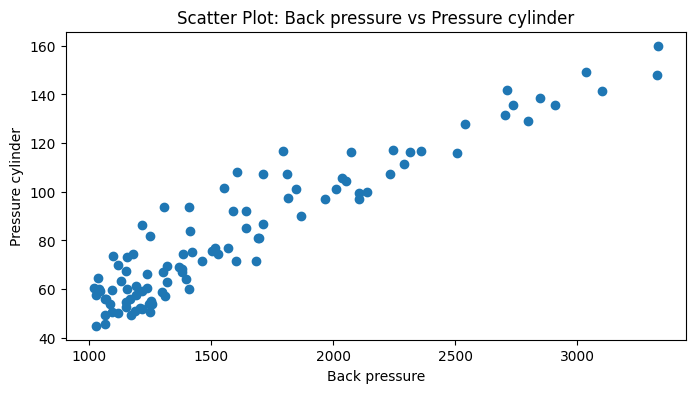

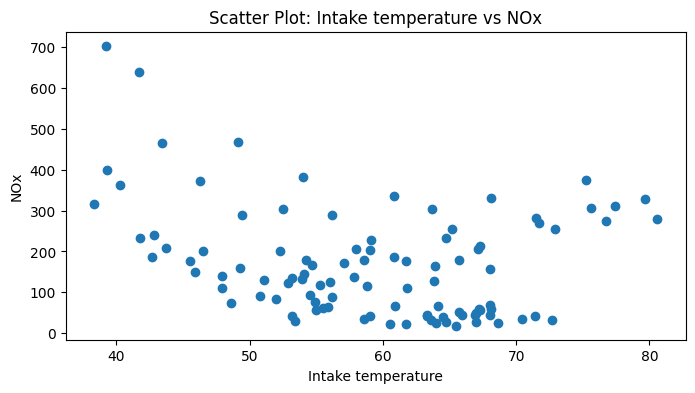

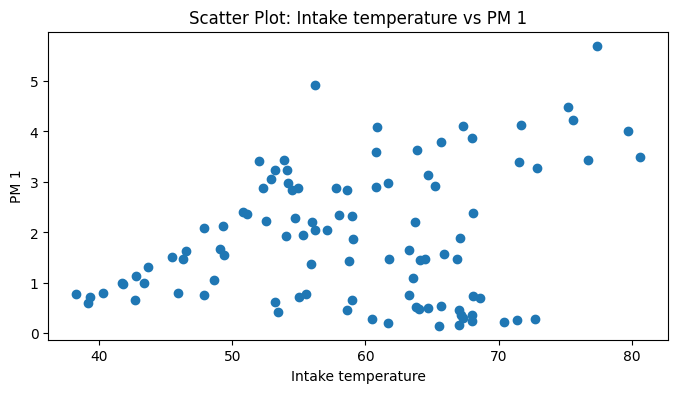

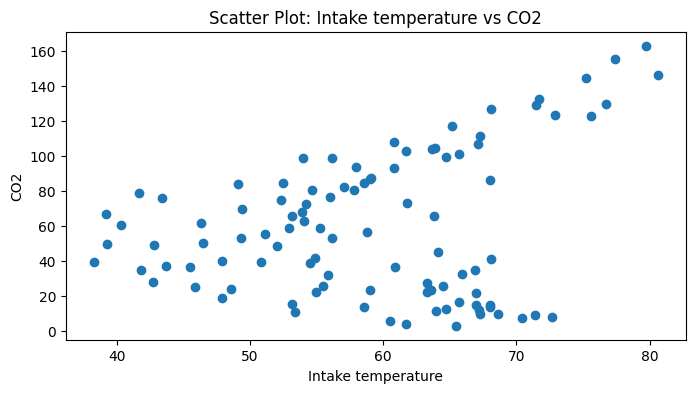

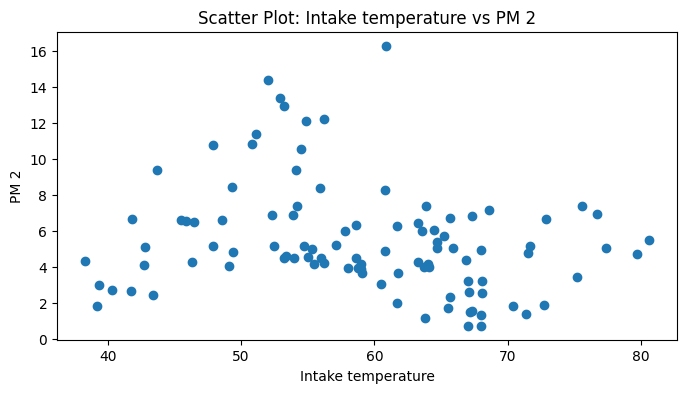

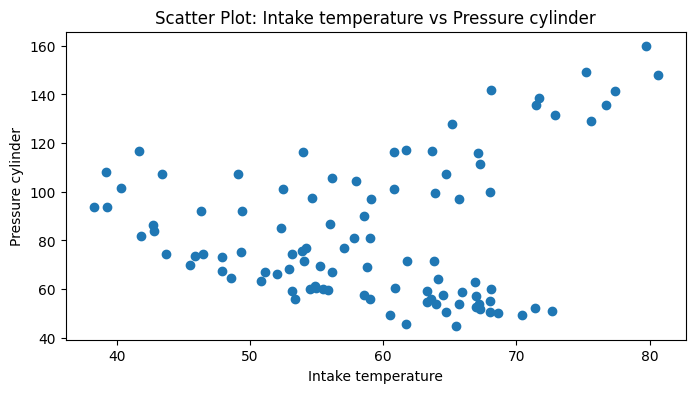

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Read data from a CSV file
file_path = 'path/to/your/file.csv'  # Update this with your file path
df = pd.read_csv("initial_data.csv")

# Assuming the inputs are in the first 8 columns and outputs are in the next 5 columns
input_columns = df.columns[:8]
output_columns = df.columns[8:]

inputs = df[input_columns].values
outputs = df[output_columns].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Predicting new data
new_data = np.random.rand(8).reshape(1, -1)  # Example new data
new_data_scaled = scaler.transform(new_data)
predictions = model.predict(new_data_scaled)
print(f'Predictions: {predictions}')

# Correlation Matrix
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Pair Plot
sns.pairplot(df)
plt.show()

# Distribution Plots
for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Scatter Plots
for input_column in input_columns:
    for output_column in output_columns:
        plt.figure(figsize=(8, 4))
        plt.scatter(df[input_column], df[output_column])
        plt.xlabel(input_column)
        plt.ylabel(output_column)
        plt.title(f'Scatter Plot: {input_column} vs {output_column}')
        plt.show()
